# Import Data

In [1199]:
from fredapi import Fred
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import requests
fred = Fred(api_key="1f71eaf7e1270ea67f4bccc7f3573520")
T=1/12

## General Data - clean up

In [1200]:
# Federal Funds Effective Rate from FRED (%)
# FedFundsRate - monthly frequency, 1960.1 - 2025.3

us_rate = fred.get_series("FEDFUNDS", observation_start="1960-01-01")

us_rate = us_rate.to_frame(name='US Rates')
us_rate.index.name = 'Date'
us_rate

,US Rates
Date,
1960-01-01,3.99
1960-02-01,3.97
1960-03-01,3.84
1960-04-01,3.92
1960-05-01,3.85
...,...
2024-12-01,4.48
2025-01-01,4.33
2025-02-01,4.33


In [1201]:
# Consumer Price Index for All Urban Consumers from FRED (%)
# CPIAUCSL - monthly frequency, 1960.1 - 2025.3

us_cpi = fred.get_series("CPIAUCSL", observation_start="1959-01-01")

us_cpi = us_cpi.to_frame(name='Inflation')
us_cpi["US Inflation (%)"] = (us_cpi["Inflation"].pct_change(periods=12)*100).round(2)

us_cpi.index.name = 'Date'
us_cpi = us_cpi.dropna()

us_cpi

,Inflation,US Inflation (%)
Date,,
1960-01-01,29.370,1.24
1960-02-01,29.410,1.41
1960-03-01,29.410,1.52
1960-04-01,29.540,1.93
1960-05-01,29.570,1.83
...,...,...
2024-12-01,317.603,2.87
2025-01-01,319.086,3.00
2025-02-01,319.775,2.81


In [1202]:
# Real Gross Domestic Product from FRED (Billion $)
# GDPC1 - quarterly frequency, 1960.1 - 2024.10

us_rgdp = fred.get_series("GDPC1", observation_start="1960-01-01")

us_rgdp = us_rgdp.to_frame(name='US Real GDP (Billion $)')
us_rgdp.index.name = 'Date'
us_rgdp

,US Real GDP (Billion $)
Date,
1960-01-01,3517.181
1960-04-01,3498.246
1960-07-01,3515.385
1960-10-01,3470.278
1961-01-01,3493.703
...,...
2024-01-01,23053.545
2024-04-01,23223.906
2024-07-01,23400.294


In [1203]:
# Real Potential Gross Domestic Product from FRED (Billion $)
# GDPPOT - quarterly frequency, 1960.1 - 2035.10

us_pgdp = fred.get_series("GDPPOT", observation_start="1960-01-01")

us_pgdp = us_pgdp.to_frame(name='US Potenical GDP (Billion $)')
us_pgdp.index.name = 'Date'
us_pgdp

,US Potenical GDP (Billion $)
Date,
1960-01-01,3493.325542
1960-04-01,3529.387830
1960-07-01,3564.886066
1960-10-01,3599.087586
1961-01-01,3632.680173
...,...
2034-10-01,28263.470000
2035-01-01,28387.010000
2035-04-01,28510.690000


In [1204]:
# Basic Bank Loan Rate from BOJ (%)
# Monthly frequency, 1980.1 - 2025.3

japan_rate = pd.read_csv('data/japan_rates.csv')
japan_rate = japan_rate.set_index('Date')

japan_rate.index = pd.to_datetime(japan_rate.index)
japan_rate

/var/folders/br/m2y9w_754p98flhxpdlv7scr0000gn/T/ipykernel_946/2463532084.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  japan_rate.index = pd.to_datetime(japan_rate.index)


,JAPAN Rates
Date,
1980-01-01,6.25
1980-02-01,7.25
1980-03-01,9.00
1980-04-01,9.00
1980-05-01,9.00
...,...
2024-11-01,0.50
2024-12-01,0.50
2025-01-01,0.75


In [1205]:
# Comsumers Price Index from Ministry of Internal Affairs & Communications (%)
# Monthly frequency, 1971.1 - 2025.2

japan_cpi = pd.read_csv('data/japan_cpi.csv')
japan_cpi = japan_cpi.set_index('Time').drop(columns=['Region', "Region Code", "Annotation"])
japan_cpi['JAPAN Inflation (%)'] = japan_cpi['Consumer Price Index (All items) 2020 base'].pct_change(periods=12) * 100
japan_cpi['JAPAN Inflation (%)'] = japan_cpi['JAPAN Inflation (%)'].round(2)


japan_cpi = japan_cpi.dropna()
japan_cpi = japan_cpi.rename(columns={'Consumer Price Index (All items) 2020 base': 'Inflation'})
japan_cpi = japan_cpi.rename_axis('Date')

japan_start_date = 'Jan.1980'
japan_cpi = japan_cpi.loc[japan_start_date:]
japan_cpi.index = pd.to_datetime(japan_cpi.index)

japan_cpi

/var/folders/br/m2y9w_754p98flhxpdlv7scr0000gn/T/ipykernel_946/348226171.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  japan_cpi.index = pd.to_datetime(japan_cpi.index)


,Inflation,JAPAN Inflation (%)
Date,,
1980-01-01,70.3,6.52
1980-02-01,70.9,7.75
1980-03-01,71.3,7.38
1980-04-01,72.6,8.04
1980-05-01,73.2,7.96
...,...,...
2024-10-01,109.5,2.24
2024-11-01,110.0,2.90
2024-12-01,110.7,3.65


In [1206]:
# Real Gross Domestic Product for Japan from FRED (Billion Yen)
# JPNRGDPEXP - quarterly frequency, 1994.1 - 2024.10

japan_rgdp = fred.get_series("JPNRGDPEXP", observation_start="1960-01-01")

japan_rgdp = japan_rgdp.to_frame(name='JAPAN Real GDP (Billion Yen)')
japan_rgdp.index.name = 'Date'
japan_rgdp

,JAPAN Real GDP (Billion Yen)
Date,
1994-01-01,446235.7
1994-04-01,443828.7
1994-07-01,448904.7
1994-10-01,447175.8
1995-01-01,452032.6
...,...
2023-10-01,555335.6
2024-01-01,552459.5
2024-04-01,556891.4


In [1207]:
# Real Potential Domestic Product for Japan from OECD (Billion Yen)
# Quarterly frequency, 1985.1 - 2025.10

japan_pgdp = pd.read_csv('data/japan_pgdp.csv')
japan_pgdp = japan_pgdp[['TIME_PERIOD', 'OBS_VALUE']]

japan_pgdp['OBS_VALUE'] = (japan_pgdp['OBS_VALUE'] / 1000000000).round(1)
japan_pgdp = japan_pgdp.rename(columns={'TIME_PERIOD': 'Date', 'OBS_VALUE': 'JAPAN Potential GDP (Billion Yen)'})
japan_pgdp = japan_pgdp.set_index('Date')
japan_pgdp.index = pd.to_datetime(japan_pgdp.index)
japan_pgdp = japan_pgdp.sort_index()

japan_pgdp

/var/folders/br/m2y9w_754p98flhxpdlv7scr0000gn/T/ipykernel_946/1558976144.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  japan_pgdp.index = pd.to_datetime(japan_pgdp.index)


,JAPAN Potential GDP (Billion Yen)
Date,
1985-01-01,332277.0
1985-04-01,335811.4
1985-07-01,339534.4
1985-10-01,344686.7
1986-01-01,350134.2
...,...
2024-10-01,613753.8
2025-01-01,617577.6
2025-04-01,621749.3


In [1208]:
# UK Bank Rate from BOE (%)
# Monthly frequency, 1975.1 - 2025.3

uk_rates = pd.read_csv('data/uk_rates.csv')
uk_rates = uk_rates.set_index('Date')
uk_rates.index = pd.to_datetime(uk_rates.index)

uk_rates = uk_rates.rename(columns={'Monthly average of official Bank Rate              [a] [b]             IUMABEDR': 'UK Rates'})
uk_rates.sort_index(inplace=True)
uk_rates.index = uk_rates.index.to_period('M').to_timestamp()
uk_rates
# print(uk_rates.columns.tolist())

/var/folders/br/m2y9w_754p98flhxpdlv7scr0000gn/T/ipykernel_946/2026095874.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  uk_rates.index = pd.to_datetime(uk_rates.index)


,UK Rates
Date,
1975-01-01,11.3295
1975-02-01,10.6875
1975-03-01,10.2632
1975-04-01,9.9091
1975-05-01,9.9762
...,...
2024-11-01,4.7976
2024-12-01,4.7500
2025-01-01,4.7500


In [1209]:
# Consumer Price Index - inflation from Fred (%)
# Monthly frequency, 1961.1 - 2023.12

uk_cpi = fred.get_series("GBRCPALTT01IXNBM", observation_start="1960-01-01")
uk_cpi = uk_cpi.to_frame(name='Inflation')
uk_cpi["UK Inflation (%)"] = (uk_cpi["Inflation"].pct_change(periods=12)*100).round(2)
uk_cpi = uk_cpi.dropna()
uk_cpi.index.name = 'Date'
uk_cpi

,Inflation,UK Inflation (%)
Date,,
1961-01-01,5.734552,2.18
1961-02-01,5.734552,2.18
1961-03-01,5.754978,2.73
1961-04-01,5.785616,2.72
1961-05-01,5.800936,2.99
...,...,...
2023-07-01,129.000000,6.44
2023-08-01,129.400000,6.24
2023-09-01,130.100000,6.38


In [1210]:
# Real Gross Domestic Product for Great Britain from FRED (Billion Pounds)
# NGDPRSAXDCGBQ - quarterly frequency, 1960.1 - 2024.10

uk_rgdp = fred.get_series("NGDPRSAXDCGBQ", observation_start="1960-01-01")

uk_rgdp = uk_rgdp.to_frame(name='UK Real GDP (Billion Pounds)')
uk_rgdp.index.name = 'Date'
uk_rgdp['UK Real GDP (Billion Pounds)'] = (uk_rgdp['UK Real GDP (Billion Pounds)'] / 1000).round(2)
uk_rgdp

,UK Real GDP (Billion Pounds)
Date,
1960-01-01,157.94
1960-04-01,156.81
1960-07-01,159.14
1960-10-01,160.14
1961-01-01,162.72
...,...
2023-10-01,633.01
2024-01-01,638.75
2024-04-01,641.67


In [1211]:
# Real Potential Domestic Product for UK from OECD (Billion Pounds)
# Quarterly frequency, 1985.1 - 2025.10

uk_pgdp = pd.read_csv('data/uk_pgdp.csv')
uk_pgdp = uk_pgdp[['TIME_PERIOD', 'OBS_VALUE']]

uk_pgdp['OBS_VALUE'] = (uk_pgdp['OBS_VALUE'] / 1000000000).round(1)
uk_pgdp = uk_pgdp.rename(columns={'TIME_PERIOD': 'Date', 'OBS_VALUE': 'UK Potential GDP (Billion Pounds)'})
uk_pgdp = uk_pgdp.set_index('Date')
uk_pgdp.index = pd.to_datetime(uk_pgdp.index)
uk_pgdp = uk_pgdp.sort_index()
uk_pgdp

/var/folders/br/m2y9w_754p98flhxpdlv7scr0000gn/T/ipykernel_946/1567307781.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  uk_pgdp.index = pd.to_datetime(uk_pgdp.index)


,UK Potential GDP (Billion Pounds)
Date,
1985-01-01,395.2
1985-04-01,404.2
1985-07-01,414.6
1985-10-01,423.7
1986-01-01,429.6
...,...
2024-10-01,2856.1
2025-01-01,2879.5
2025-04-01,2900.7


### Taylor Rule Gap

In [1212]:
# Taylor Rule Rate - Apply function
def taylor_rate(neutral_rate, inflation, inflation_target, output_gap):
    return neutral_rate + inflation + 0.5 * (inflation - inflation_target) + 0.5 * output_gap

def taylor_rate_gap(rate, taylor_rate):
    return rate - taylor_rate

## US

In [1213]:
US_inflation_target = 2.0
US_neutral_rate = 0.5

US_real_gdp_monthly = us_rgdp.resample('MS').interpolate('linear')
US_potential_gdp_monthly = us_pgdp.resample('MS').interpolate('linear')

In [1214]:
US_merged_rete_cpi = us_rate.merge(us_cpi, left_index=True, right_index=True, how='inner').drop(columns=['Inflation'])
US_merged_rete_cpi

,US Rates,US Inflation (%)
Date,,
1960-01-01,3.99,1.24
1960-02-01,3.97,1.41
1960-03-01,3.84,1.52
1960-04-01,3.92,1.93
1960-05-01,3.85,1.83
...,...,...
2024-12-01,4.48,2.87
2025-01-01,4.33,3.00
2025-02-01,4.33,2.81


In [1215]:
US_merged_rgdp_gdp = us_rgdp.merge(us_pgdp, left_index=True, right_index=True, how='inner')
US_merged_rgdp_gdp

,US Real GDP (Billion $),US Potenical GDP (Billion $)
Date,,
1960-01-01,3517.181,3493.325542
1960-04-01,3498.246,3529.387830
1960-07-01,3515.385,3564.886066
1960-10-01,3470.278,3599.087586
1961-01-01,3493.703,3632.680173
...,...,...
2024-01-01,23053.545,22718.130000
2024-04-01,23223.906,22849.870000
2024-07-01,23400.294,22981.320000


,US Output Gap,Taylor rate,Taylor Rate Gap
Date,,,
1960-01-01,0.006829,5.488414,-1.498414
1960-02-01,0.001576,5.455788,-1.485788
1960-03-01,-0.003642,5.258179,-1.418179
1960-04-01,-0.008824,5.375588,-1.455588
1960-05-01,-0.010522,5.269739,-1.419739
...,...,...,...
2024-06-01,0.017613,7.503806,-2.173806
2024-07-01,0.018231,7.504116,-2.174116
2024-08-01,0.018341,7.504171,-2.174171


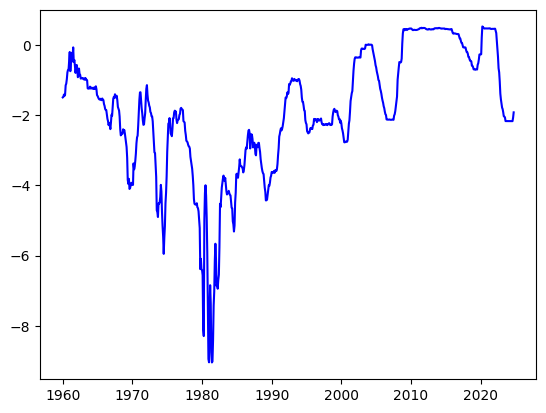

In [1216]:
# US Gap
US_gap = (US_real_gdp_monthly["US Real GDP (Billion $)"] - US_potential_gdp_monthly["US Potenical GDP (Billion $)"]) / US_potential_gdp_monthly["US Potenical GDP (Billion $)"]
US_gap = US_gap.to_frame(name='US Output Gap')
US_gap = US_gap["1960-01-01":"2024-10-01"]

# US Taylor Rate
US_gap["Taylor rate"] = taylor_rate(US_neutral_rate, US_merged_rete_cpi['US Rates'], US_inflation_target, US_gap['US Output Gap'])
US_gap = US_gap.dropna()

# US Taylor Rate Gap
US_gap["Taylor Rate Gap"] = taylor_rate_gap(US_merged_rete_cpi['US Rates'], US_gap["Taylor rate"])

plt.plot(US_gap.index, US_gap["Taylor Rate Gap"], label='US Taylor Rate Gap', color='blue')
US_gap


## Japan

In [1217]:
JAPAN_inflation_target = 2.0
JAPAN_neutral_rate = 0.5

JAPAN_real_gdp_monthly = japan_rgdp.resample('MS').interpolate('linear')
JAPAN_potential_gdp_monthly = japan_pgdp.resample('MS').interpolate('linear')

In [1218]:
JAPAN_merged_rete_cpi = japan_rate.merge(japan_cpi, left_index=True, right_index=True, how='inner').drop(columns=['Inflation'])
JAPAN_merged_rete_cpi


,JAPAN Rates,JAPAN Inflation (%)
Date,,
1980-01-01,6.25,6.52
1980-02-01,7.25,7.75
1980-03-01,9.00,7.38
1980-04-01,9.00,8.04
1980-05-01,9.00,7.96
...,...,...
2024-10-01,0.50,2.24
2024-11-01,0.50,2.90
2024-12-01,0.50,3.65


In [1219]:
JAPAN_merged_rgdp_gdp = japan_rgdp.merge(japan_pgdp, left_index=True, right_index=True, how='inner')
JAPAN_merged_rgdp_gdp


,JAPAN Real GDP (Billion Yen),JAPAN Potential GDP (Billion Yen)
Date,,
1994-01-01,446235.7,518664.0
1994-04-01,443828.7,522829.4
1994-07-01,448904.7,523100.5
1994-10-01,447175.8,526001.3
1995-01-01,452032.6,525578.1
...,...,...
2023-10-01,555335.6,598141.8
2024-01-01,552459.5,601861.7
2024-04-01,556891.4,605801.5


,JAPAN Output Gap,Taylor rate,Taylor Rate Gap
Date,,,
1994-01-01,-0.139644,2.055178,-0.305178
1994-02-01,-0.143484,2.053258,-0.303258
1994-03-01,-0.147303,2.051348,-0.301348
1994-04-01,-0.151102,2.049449,-0.299449
1994-05-01,-0.148013,2.050993,-0.300993
...,...,...,...
2024-06-01,-0.082609,-0.091305,0.391305
2024-07-01,-0.083539,-0.091770,0.391770
2024-08-01,-0.083814,0.208093,0.291907


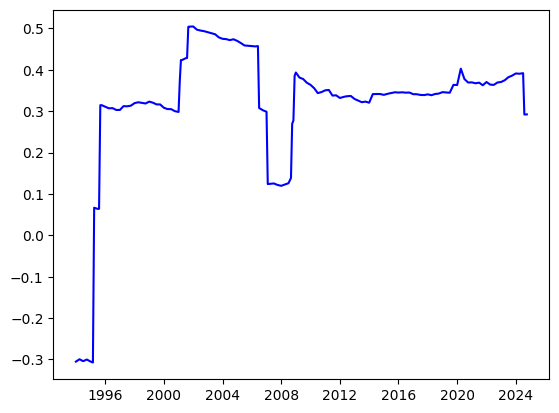

In [1220]:
# Japan Gap
JAPAN_gap = (JAPAN_real_gdp_monthly["JAPAN Real GDP (Billion Yen)"] - JAPAN_potential_gdp_monthly["JAPAN Potential GDP (Billion Yen)"]) / JAPAN_potential_gdp_monthly["JAPAN Potential GDP (Billion Yen)"]
JAPAN_gap = JAPAN_gap.to_frame(name='JAPAN Output Gap')
JAPAN_gap = JAPAN_gap["1960-01-01":"2024-10-01"]

# JAPAN Taylor Rate
JAPAN_gap["Taylor rate"] = taylor_rate(JAPAN_neutral_rate, JAPAN_merged_rete_cpi['JAPAN Rates'], JAPAN_inflation_target, JAPAN_gap['JAPAN Output Gap'])
JAPAN_gap = JAPAN_gap.dropna()

# JAPAN Taylor Rate Gap
JAPAN_gap["Taylor Rate Gap"] = taylor_rate_gap(JAPAN_merged_rete_cpi['JAPAN Rates'], JAPAN_gap["Taylor rate"])

plt.plot(JAPAN_gap.index, JAPAN_gap["Taylor Rate Gap"], label='JAPAN Taylor Rate Gap', color='blue')
JAPAN_gap


## UK

In [1221]:
UK_inflation_target = 2.0
UK_neutral_rate = 0.5

UK_real_gdp_monthly = uk_rgdp.resample('MS').interpolate('linear')
UK_potential_gdp_monthly = uk_pgdp.resample('MS').interpolate('linear')

In [1222]:
UK_merged_rete_cpi = uk_rates.merge(uk_cpi, left_index=True, right_index=True, how='inner').drop(columns=['Inflation'])
UK_merged_rete_cpi

,UK Rates,UK Inflation (%)
Date,,
1975-01-01,11.3295,19.90
1975-02-01,10.6875,19.86
1975-03-01,10.2632,21.15
1975-04-01,9.9091,21.68
1975-05-01,9.9762,25.00
...,...,...
2023-07-01,5.0000,6.44
2023-08-01,5.2273,6.24
2023-09-01,5.2500,6.38


In [1223]:
UK_merged_rgdp_gdp = uk_rgdp.merge(uk_pgdp, left_index=True, right_index=True, how='inner')
UK_merged_rgdp_gdp

,UK Real GDP (Billion Pounds),UK Potential GDP (Billion Pounds)
Date,,
1985-01-01,292.61,395.2
1985-04-01,298.87,404.2
1985-07-01,298.81,414.6
1985-10-01,298.98,423.7
1986-01-01,302.12,429.6
...,...,...
2023-10-01,633.01,2753.0
2024-01-01,638.75,2781.2
2024-04-01,641.67,2807.5


,UK Output Gap,Taylor rate,Taylor Rate Gap
Date,,,
1985-01-01,-0.259590,16.432705,-5.057705
1985-02-01,-0.259928,20.182536,-6.307536
1985-03-01,-0.260261,19.825220,-6.188320
1985-04-01,-0.260589,18.382206,-5.707206
1985-05-01,-0.266926,17.929037,-5.554037
...,...,...,...
2023-07-01,-0.768830,6.615585,-1.615585
2023-08-01,-0.769243,6.956329,-1.729029
2023-09-01,-0.769655,6.990173,-1.740173


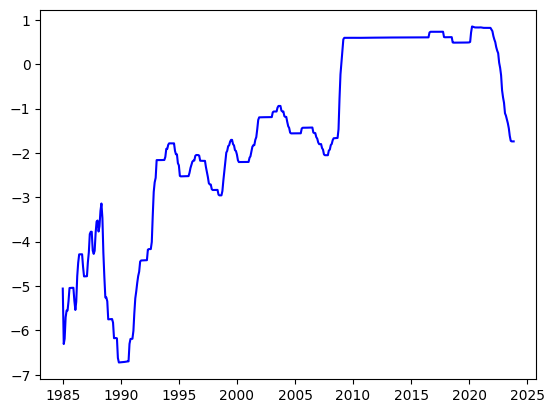

In [1224]:
# UK Gap
UK_gap = (UK_real_gdp_monthly["UK Real GDP (Billion Pounds)"] - UK_potential_gdp_monthly["UK Potential GDP (Billion Pounds)"]) / UK_potential_gdp_monthly["UK Potential GDP (Billion Pounds)"]
UK_gap = UK_gap.to_frame(name='UK Output Gap')
UK_gap = UK_gap["1960-01-01":"2024-10-01"]

# UK Taylor Rate
UK_gap["Taylor rate"] = taylor_rate(UK_neutral_rate, UK_merged_rete_cpi['UK Rates'], UK_inflation_target, UK_gap['UK Output Gap'])
UK_gap = UK_gap.dropna()

# UK Taylor Rate Gap
UK_gap["Taylor Rate Gap"] = taylor_rate_gap(UK_merged_rete_cpi['UK Rates'], UK_gap["Taylor rate"])

plt.plot(UK_gap.index, UK_gap["Taylor Rate Gap"], label='UK Taylor Rate Gap', color='blue')
UK_gap

## Coverd Interest Parity 

### USD/JPY

In [1225]:
# USD/JPY Spot FX Rate
usdjpy_spotFXrate = fred.get_series("EXJPUS", observation_start="1980-01-01")

usdjpy_spotFXrate = usdjpy_spotFXrate.to_frame(name='USD/JPY Spot FX Rate')
usdjpy_spotFXrate.index.name = 'Date'


# USD/JPY Forward FX Rate
USDJPYFX_rate = usdjpy_spotFXrate.merge(US_merged_rete_cpi, left_index=True, right_index=True, how='inner').merge(JAPAN_merged_rete_cpi, left_index=True, right_index=True, how='inner').drop(columns=["JAPAN Inflation (%)", "US Inflation (%)"])

def forward_fx_rate_row(row):
    T=1/12
    spot = row["USD/JPY Spot FX Rate"]
    i_usd = row["US Rates"]
    i_jpy = row["JAPAN Rates"]
    return spot * ((1 + i_usd) / (1 + i_jpy)) ** T

USDJPYFX_rate["USD/JPY Forward FX Rate"] = USDJPYFX_rate.apply(forward_fx_rate_row, axis=1)
USDJPYFX_rate

,USD/JPY Spot FX Rate,US Rates,JAPAN Rates,USD/JPY Forward FX Rate
Date,,,,
1980-01-01,237.8886,13.82,6.25,252.493080
1980-02-01,244.3500,14.13,7.25,257.016551
1980-03-01,248.4786,17.19,9.00,261.181082
1980-04-01,250.2750,17.61,9.00,263.570217
1980-05-01,228.6286,10.98,9.00,232.096518
...,...,...,...,...
2024-10-01,149.8909,4.83,0.50,167.844343
2024-11-01,153.7126,4.64,0.50,171.649202
2024-12-01,153.8143,4.48,0.50,171.351333


,CIP Deviation
Date,
1980-01-01,-0.353402
1980-02-01,-0.305565
1980-03-01,-0.338879
1980-04-01,-0.356878
1980-05-01,-0.079117
...,...
2024-10-01,-0.226623
2024-11-01,-0.214511
2024-12-01,-0.204386


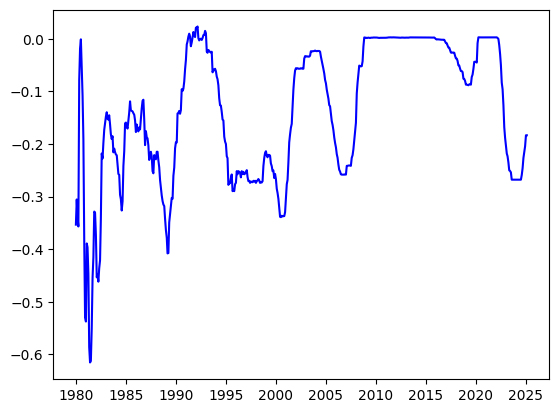

In [1226]:
# USD/JPY CIP Deviation
usdjpy_theoretical_fwd_ratio = (1 + USDJPYFX_rate["US Rates"] * T) / (1 + USDJPYFX_rate["JAPAN Rates"] * T)
usdjpy_actual_fwd_ratio = USDJPYFX_rate["USD/JPY Forward FX Rate"] / USDJPYFX_rate["USD/JPY Spot FX Rate"]
USDJPY_cip_deviation = usdjpy_actual_fwd_ratio - usdjpy_theoretical_fwd_ratio

USDJPY_cip_deviation = USDJPY_cip_deviation.to_frame(name="CIP Deviation")
USDJPY_cip_deviation.index.name = "Date"

plt.plot(USDJPY_cip_deviation.index, USDJPY_cip_deviation["CIP Deviation"], label='USD/JPY CIP Deviation', color='blue')
USDJPY_cip_deviation

In [1227]:
# USD/JPY CIP signal
USDJPY_threshold = USDJPY_cip_deviation["CIP Deviation"].rolling(60).std()
USDJPY_signal = abs(USDJPY_cip_deviation["CIP Deviation"]) > 2.5 * USDJPY_threshold

USDJPY_signal = USDJPY_signal.to_frame(name="CIP Signal")
USDJPY_signal.index.name = "Date"

USDJPY_signal

,CIP Signal
Date,
1980-01-01,False
1980-02-01,False
1980-03-01,False
1980-04-01,False
1980-05-01,False
...,...
2024-10-01,False
2024-11-01,False
2024-12-01,False


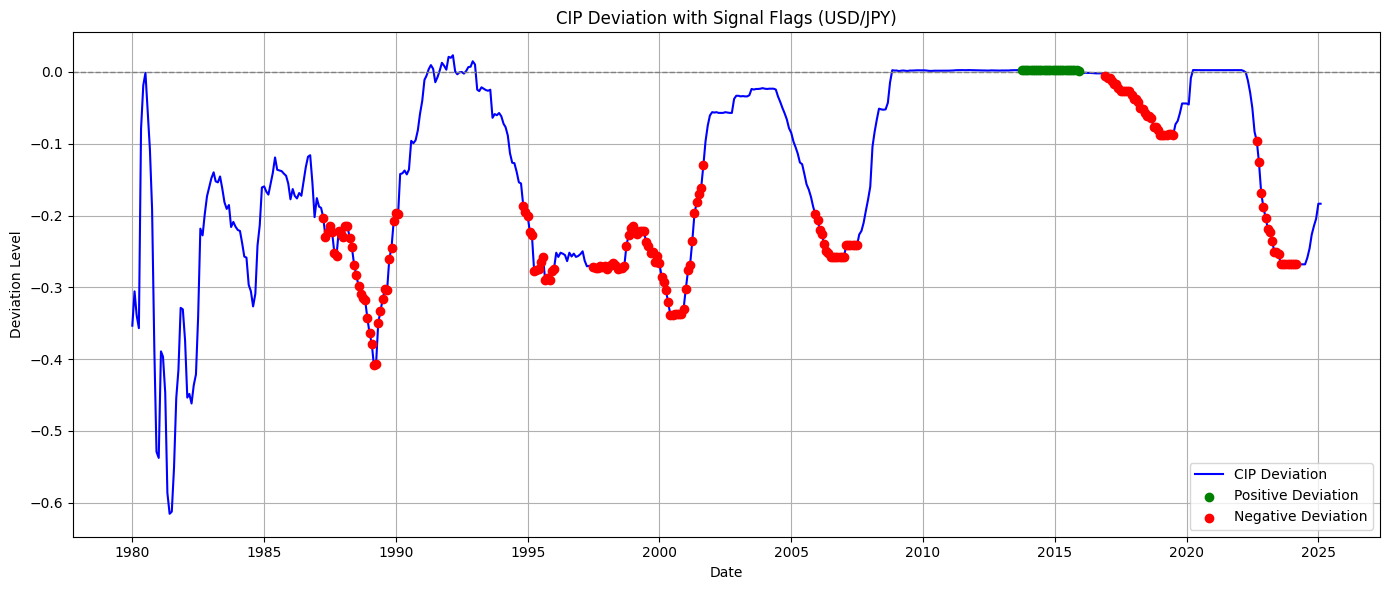

In [1228]:
# CIP signal Plot
signal_dates = USDJPY_signal[USDJPY_signal["CIP Signal"] == True].index
signal_values = USDJPY_cip_deviation.loc[signal_dates]

# Split into positive and negative signals
positive_signals = signal_values[signal_values > 0]
negative_signals = signal_values[signal_values < 0]

plt.figure(figsize=(14, 6))
plt.plot(USDJPY_cip_deviation.index, USDJPY_cip_deviation.values, label="CIP Deviation", color="blue")

# Positive = green dots
plt.scatter(positive_signals.index, positive_signals.values, color='green', label='Positive Deviation', zorder=5)

# Negative = red dots
plt.scatter(negative_signals.index, negative_signals.values, color='red', label='Negative Deviation', zorder=5)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.title("CIP Deviation with Signal Flags (USD/JPY)")
plt.xlabel("Date")
plt.ylabel("Deviation Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [1229]:
# Trade signal
USDJPY_taylor_direction = np.sign(US_gap["Taylor Rate Gap"])  # +1 = long, -1 = short, 0 = no bias

USDJPY_cip_direction = np.sign(USDJPY_cip_deviation["CIP Deviation"])  # +1 = long bias, -1 = short bias

USDJPY_cip_direction = pd.Series(np.sign(USDJPY_cip_deviation["CIP Deviation"]), index=USDJPY_cip_deviation.index)
USDJPY_taylor_direction = pd.Series(np.sign(US_gap["Taylor Rate Gap"]), index=USDJPY_cip_deviation.index)

# trend_filter = USDJPYFX_rate["USD/JPY Spot FX Rate"] > USDJPYFX_rate["USD/JPY Spot FX Rate"].rolling(90).mean()

USDJPY_confirmed_signal = (USDJPY_signal["CIP Signal"] & (USDJPY_cip_direction == USDJPY_taylor_direction))

USDJPY_trade_signal = pd.Series(index=USDJPY_confirmed_signal.index, dtype='float')
USDJPY_trade_signal[USDJPY_confirmed_signal] = USDJPY_taylor_direction[USDJPY_confirmed_signal]

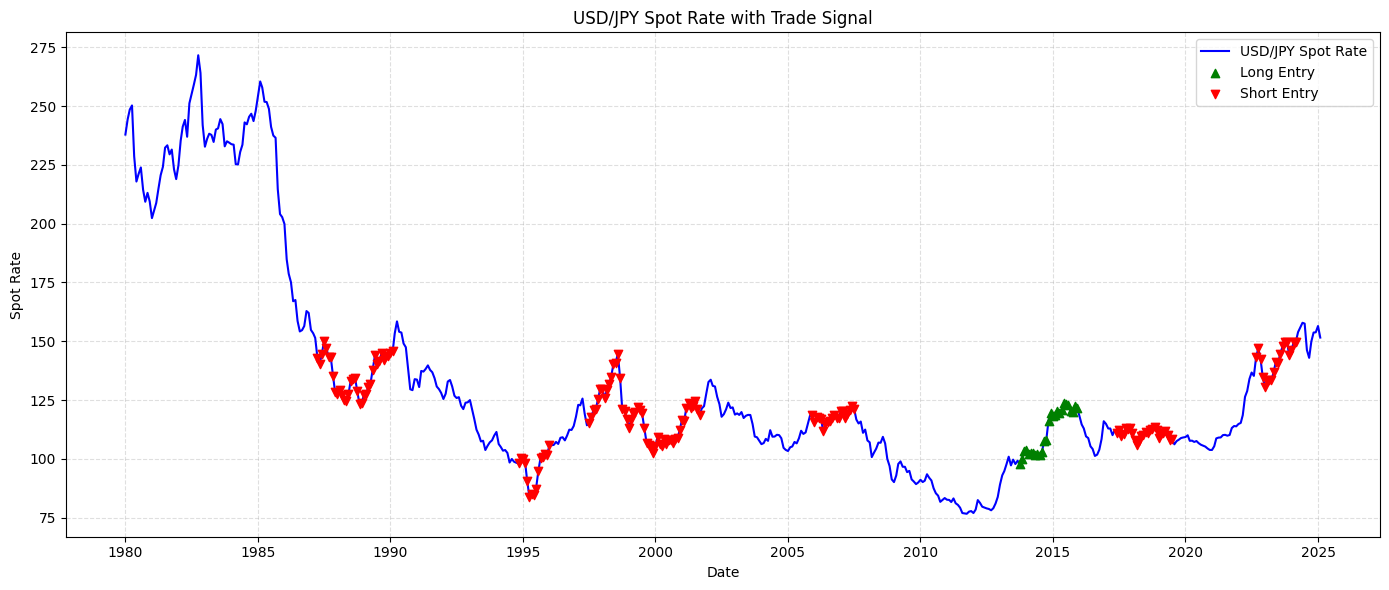

In [1230]:
# Trade signal plot
JPYentry_signals = USDJPY_trade_signal.dropna()
JAPANspot_rate = USDJPYFX_rate["USD/JPY Spot FX Rate"]

common_index = JAPANspot_rate.index.intersection(JPYentry_signals.index)
entry_signals = JPYentry_signals.loc[common_index]
entry_spot = JAPANspot_rate.loc[common_index]

plt.figure(figsize=(14, 6))

# Plot FX Spot Rate
plt.plot(JAPANspot_rate.index, JAPANspot_rate.values, label="USD/JPY Spot Rate", color='blue')

# Overlay Long Signals (Buy USD)
long_signals = entry_signals[entry_signals == 1]
plt.scatter(long_signals.index, JAPANspot_rate.loc[long_signals.index], 
            marker='^', color='green', label='Long Entry', zorder=5)

# Overlay Short Signals (Sell USD)
short_signals = entry_signals[entry_signals == -1]
plt.scatter(short_signals.index, JAPANspot_rate.loc[short_signals.index], 
            marker='v', color='red', label='Short Entry', zorder=5)

plt.title("USD/JPY Spot Rate with Trade Signal")
plt.xlabel("Date")
plt.ylabel("Spot Rate")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

In [1231]:
# Exit plan for Japan
# Stop-loss limit & trailing z-score reversal
JPYposition = pd.Series(index=JPYentry_signals.index, dtype='float64')
holding = False
entry_price = None
entry_date = None
direction = None
trade_log = []

for i in range(len(JPYentry_signals)):
    date = JPYentry_signals.index[i]
    signal = JPYentry_signals.iloc[i]
    price = USDJPYFX_rate["USD/JPY Spot FX Rate"].iloc[i]
    z = USDJPY_cip_deviation["CIP Deviation"].iloc[i]

    if not holding:
        if pd.notna(signal):
            direction = signal
            entry_price = price
            entry_date = date
            holding = True
            JPYposition.iloc[i] = direction
        else:
            JPYposition.iloc[i] = np.nan
    else:
        # Compute unrealized return
        trade_return = (price - entry_price) / entry_price * direction

        # Exit logic
        exit_due_to_stop_loss = trade_return < -0.015
        exit_due_to_z_reversal = (
            (direction == 1 and z < 0.5) or
            (direction == -1 and z > -0.5)
        )
   
        if exit_due_to_stop_loss or exit_due_to_z_reversal:
            trade_log.append({
                "Entry Date": entry_date,
                "Exit Date": date,
                "Direction": "Long" if direction == 1 else "Short",
                "Entry Price": entry_price,
                "Exit Price": price,
                "Return": trade_return,
                "Duration (days)": (date - entry_date).days
            })
            holding = False
            direction = None
            entry_price = None
            entry_date = None
            JPYposition.iloc[i] = np.nan
        else:
            JPYposition.iloc[i] = direction

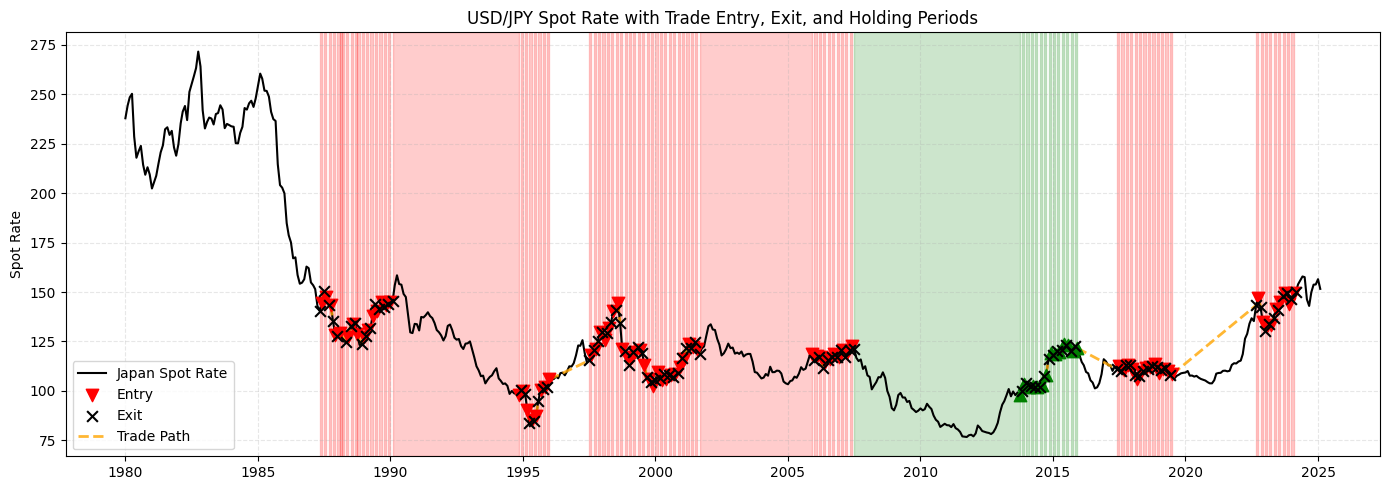

In [1232]:
# Final trading signal gragh for USD/JPY
JAPANposition_clean = JPYposition.copy().fillna(0)
JAPANspot_rate = JAPANspot_rate.dropna()  # ensure no missing values

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(JAPANspot_rate.index, JAPANspot_rate, label='Japan Spot Rate', color='black')

# Highlight holding periods (shaded)
for i in range(1, len(JAPANposition_clean)):
    if JAPANposition_clean.iloc[i] != 0:
        color = 'green' if JAPANposition_clean.iloc[i] == 1 else 'red'
        ax.axvspan(JAPANposition_clean.index[i-1], JAPANposition_clean.index[i], 
                   color=color, alpha=0.2)

# Step 2: Detect entries & exits
entry_dates = []
exit_dates = []
entry_types = []  # +1 for long, -1 for short

for i in range(1, len(JAPANposition_clean)):
    prev = JAPANposition_clean.iloc[i - 1]
    curr = JAPANposition_clean.iloc[i]
    date = JAPANposition_clean.index[i]
    
    if prev == 0 and curr != 0:
        entry_dates.append(date)
        entry_types.append(curr)
    elif prev != 0 and curr == 0:
        exit_dates.append(date)

# Plot entry markers (▲/▼)
for date, direction in zip(entry_dates, entry_types):
    if date in JAPANspot_rate.index:
        rate = JAPANspot_rate.loc[date]
        marker = '^' if direction == 1 else 'v'
        color = 'green' if direction == 1 else 'red'
        ax.scatter(date, rate, marker=marker, color=color, s=80, zorder=5,
                   label='Entry' if date == entry_dates[0] else "")

# Plot exit markers (×)
for date in exit_dates:
    if date in JAPANspot_rate.index:
        rate = JAPANspot_rate.loc[date]
        ax.scatter(date, rate, marker='x', color='black', s=60, zorder=5,
                   label='Exit' if date == exit_dates[0] else "")

# Connect entry → exit with dashed line
for entry_date, direction in zip(entry_dates, entry_types):
    # Find the next exit after this entry
    possible_exits = [d for d in exit_dates if d > entry_date]
    if not possible_exits:
        continue  

    exit_date = possible_exits[0]

    # Get spot prices
    if entry_date in JAPANspot_rate.index and exit_date in JAPANspot_rate.index:
        entry_price = JAPANspot_rate.loc[entry_date]
        exit_price = JAPANspot_rate.loc[exit_date]

        ax.plot([entry_date, exit_date], [entry_price, exit_price],
                color='orange', linestyle='--', linewidth=2, alpha=0.8,
                label='Trade Path' if entry_date == entry_dates[0] else "")
        
# ax.set_xlim(pd.Timestamp("2014-01-01"), pd.Timestamp("2019-01-01"))

ax.set_title("USD/JPY Spot Rate with Trade Entry, Exit, and Holding Periods")
ax.set_ylabel("Spot Rate")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### USD/GBD

In [1233]:
# USD/GBD Spot FX Rate
usdgbd_spotFXrate = fred.get_series("EXUSUK", observation_start="1980-01-01")

usdgbd_spotFXrate = usdgbd_spotFXrate.to_frame(name='USD/GBD Spot FX Rate')
usdgbd_spotFXrate.index.name = 'Date'

# USD/GBD Forward FX Rate
USDGBDFX_rate = usdgbd_spotFXrate.merge(US_merged_rete_cpi, left_index=True, right_index=True, how='inner').merge(UK_merged_rete_cpi, left_index=True, right_index=True, how='inner').drop(columns=["UK Inflation (%)", "US Inflation (%)"])

def forward_fx_rate_row1(row):
    T=1/12
    spot = row["USD/GBD Spot FX Rate"]
    i_usd = row["US Rates"]
    i_gbd = row["UK Rates"]
    return spot * ((1 + i_usd) / (1 + i_gbd)) ** T


USDGBDFX_rate["USD/GBD Forward FX Rate"] = USDGBDFX_rate.apply(forward_fx_rate_row1, axis=1)
USDGBDFX_rate


,USD/GBD Spot FX Rate,US Rates,UK Rates,USD/GBD Forward FX Rate
Date,,,,
1980-01-01,2.2641,13.82,17.0000,2.227718
1980-02-01,2.2891,14.13,17.0000,2.256205
1980-03-01,2.2045,17.19,17.0000,2.206430
1980-04-01,2.2094,17.61,17.0000,2.215545
1980-05-01,2.3020,10.98,17.0000,2.225208
...,...,...,...,...
2023-07-01,1.2893,5.12,5.0000,1.291429
2023-08-01,1.2706,5.33,5.2273,1.272333
2023-09-01,1.2381,5.33,5.2500,1.239413


,CIP Deviation
Date,
1980-01-01,0.093586
1980-02-01,0.084595
1980-03-01,-0.005676
1980-04-01,-0.018253
1980-05-01,0.174228
...,...
2023-07-01,-0.005407
2023-08-01,-0.004597
2023-09-01,-0.003577


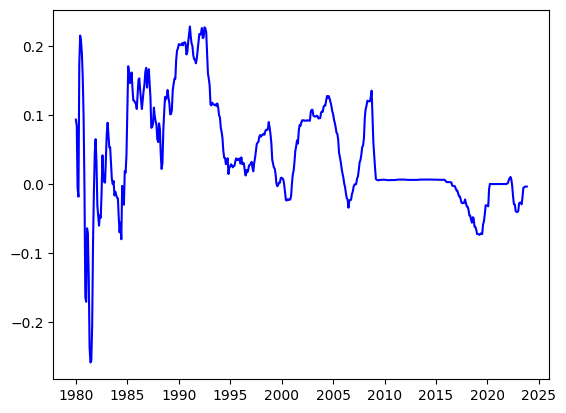

In [1234]:
# USD/GBD CIP Deviation
usdgbd_theoretical_fwd_ratio = (1 + USDGBDFX_rate["US Rates"] * T) / (1 + USDGBDFX_rate["UK Rates"] * T)
usdgbd_actual_fwd_ratio = USDGBDFX_rate["USD/GBD Forward FX Rate"] / USDGBDFX_rate["USD/GBD Spot FX Rate"]
USDGBD_cip_deviation = usdgbd_actual_fwd_ratio - usdgbd_theoretical_fwd_ratio

USDGBD_cip_deviation = USDGBD_cip_deviation.to_frame(name="CIP Deviation")
USDGBD_cip_deviation.index.name = "Date"

plt.plot(USDGBD_cip_deviation.index, USDGBD_cip_deviation["CIP Deviation"], label='USD/GBD CIP Deviation', color='blue')
USDGBD_cip_deviation

In [1235]:
# USD/GBD CIP signal
USDGBD_threshold = USDGBD_cip_deviation["CIP Deviation"].rolling(60).std()
USDGBD_signal = abs(USDGBD_cip_deviation["CIP Deviation"]) > 2.5 * USDGBD_threshold

USDGBD_signal = USDGBD_signal.to_frame(name="CIP Signal")
USDGBD_signal.index.name = "Date"

USDGBD_signal

,CIP Signal
Date,
1980-01-01,False
1980-02-01,False
1980-03-01,False
1980-04-01,False
1980-05-01,False
...,...
2023-07-01,False
2023-08-01,False
2023-09-01,False


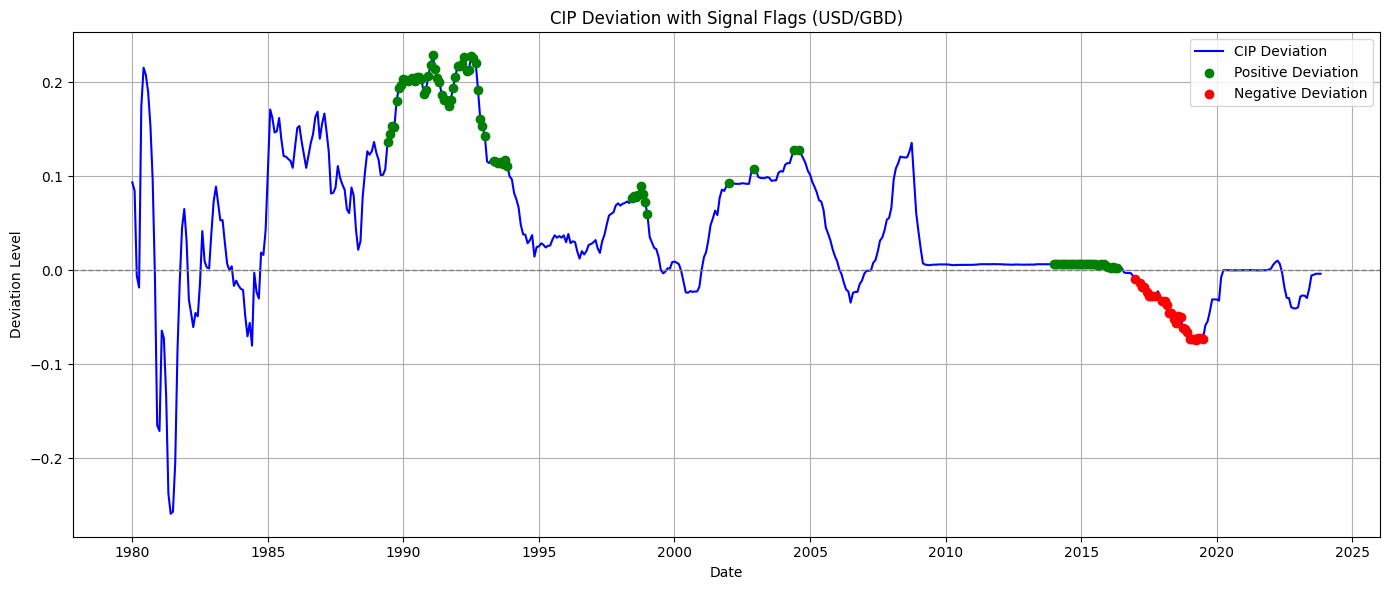

In [1236]:
# USD/GBD trade signal
signal_dates = USDGBD_signal[USDGBD_signal["CIP Signal"] == True].index
signal_values = USDGBD_cip_deviation.loc[signal_dates]

# Split into positive and negative signals
positive_signals = signal_values[signal_values > 0]
negative_signals = signal_values[signal_values < 0]

plt.figure(figsize=(14, 6))
plt.plot(USDGBD_cip_deviation.index, USDGBD_cip_deviation.values, label="CIP Deviation", color="blue")

# Positive = green dots
plt.scatter(positive_signals.index, positive_signals.values, color='green', label='Positive Deviation', zorder=5)

# Negative = red dots
plt.scatter(negative_signals.index, negative_signals.values, color='red', label='Negative Deviation', zorder=5)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.title("CIP Deviation with Signal Flags (USD/GBD)")
plt.xlabel("Date")
plt.ylabel("Deviation Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [1237]:
# cip_deviation_signal: Boolean Series (True when Z > 1.5 or < –1.5)
# taylor_gap: Float Series (Taylor actual - implied rate)
# match both cip_deviation_signal & taylor_gap

USDGBD_taylor_direction = np.sign(US_gap["Taylor Rate Gap"])  # +1 = long, -1 = short, 0 = no bias

USDGBD_cip_direction = np.sign(USDGBD_cip_deviation["CIP Deviation"])  # +1 = long bias, -1 = short bias

USDGBD_cip_direction = pd.Series(np.sign(USDGBD_cip_deviation["CIP Deviation"]), index=USDGBD_cip_deviation.index)
USDGBD_taylor_direction = pd.Series(np.sign(US_gap["Taylor Rate Gap"]), index=USDGBD_cip_deviation.index)

USDGBD_confirmed_signal = (USDGBD_signal["CIP Signal"] & (USDGBD_cip_direction == USDGBD_taylor_direction))

USDGBD_trade_signal = pd.Series(index=USDGBD_confirmed_signal.index, dtype='float')
USDGBD_trade_signal[USDGBD_confirmed_signal] = USDGBD_taylor_direction[USDGBD_confirmed_signal]

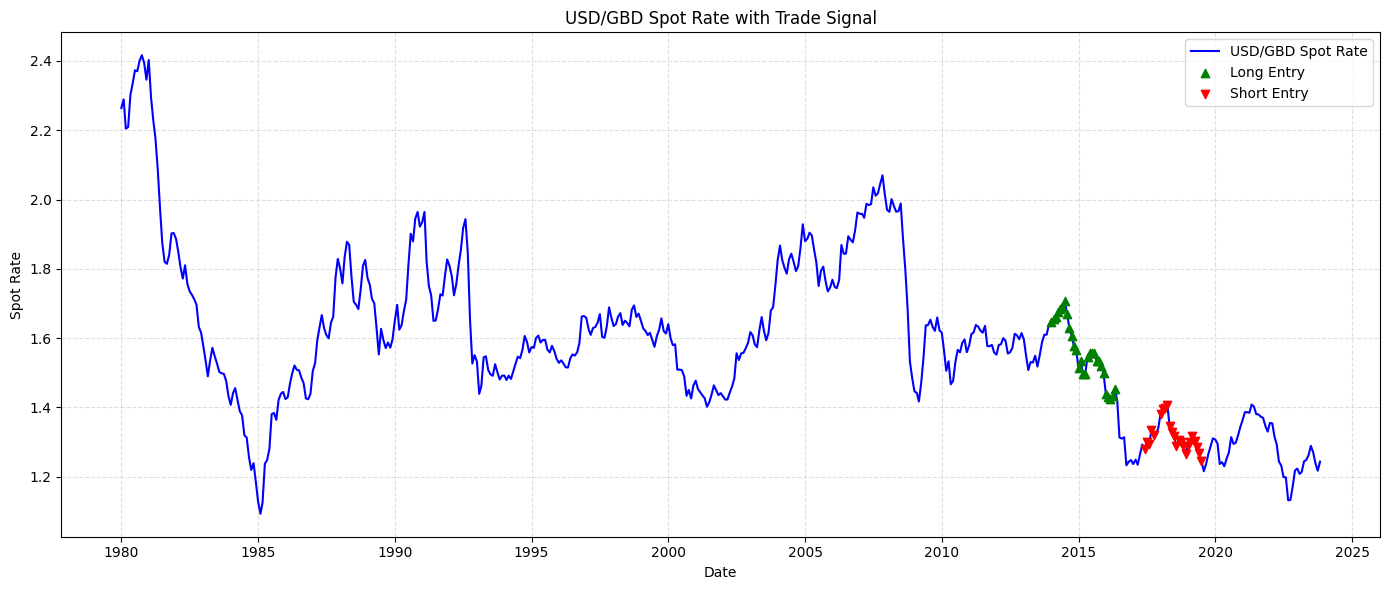

In [1238]:
UKentry_signals = USDGBD_trade_signal.dropna()
UKspot_rate = USDGBDFX_rate["USD/GBD Spot FX Rate"]

common_index = UKspot_rate.index.intersection(UKentry_signals.index)
UKentry_signals = UKentry_signals.loc[common_index]
entry_spot = UKspot_rate.loc[common_index]

plt.figure(figsize=(14, 6))

# Plot FX Spot Rate
plt.plot(UKspot_rate.index, UKspot_rate.values, label="USD/GBD Spot Rate", color='blue')

# Overlay Long Signals (Buy USD)
long_signals = UKentry_signals[UKentry_signals == 1]
plt.scatter(long_signals.index, UKspot_rate.loc[long_signals.index], 
            marker='^', color='green', label='Long Entry', zorder=5)

# Overlay Short Signals (Sell USD)
short_signals = UKentry_signals[UKentry_signals == -1]
plt.scatter(short_signals.index, UKspot_rate.loc[short_signals.index], 
            marker='v', color='red', label='Short Entry', zorder=5)

plt.title("USD/GBD Spot Rate with Trade Signal")
plt.xlabel("Date")
plt.ylabel("Spot Rate")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

In [1239]:
# Exit plan for UK
# stop-loss limit & trailing z-score reversal
UKposition = pd.Series(index=UKentry_signals.index, dtype='float64')
holding = False
entry_price = None
entry_date = None
direction = None
trade_log = []

for i in range(len(UKentry_signals)):
    date = UKentry_signals.index[i]
    signal = UKentry_signals.iloc[i]
    price = USDGBDFX_rate["USD/GBD Spot FX Rate"].iloc[i]
    z = USDGBD_cip_deviation["CIP Deviation"].iloc[i]

    if not holding:
        if pd.notna(signal):
            direction = signal
            entry_price = price
            entry_date = date
            holding = True
            UKposition.iloc[i] = direction
        else:
            UKposition.iloc[i] = np.nan
    else:
        # Compute unrealized return
        trade_return = (price - entry_price) / entry_price * direction

        # Exit logic
        exit_due_to_stop_loss = trade_return < -0.015
        exit_due_to_z_reversal = (
            (direction == 1 and z < 0.5) or
            (direction == -1 and z > -0.5)
        )

        if exit_due_to_stop_loss or exit_due_to_z_reversal:
            trade_log.append({
                "Entry Date": entry_date,
                "Exit Date": date,
                "Direction": "Long" if direction == 1 else "Short",
                "Entry Price": entry_price,
                "Exit Price": price,
                "Return": trade_return,
                "Duration (days)": (date - entry_date).days
            })
            holding = False
            direction = None
            entry_price = None
            entry_date = None
            UKposition.iloc[i] = np.nan
        else:
            UKposition.iloc[i] = direction

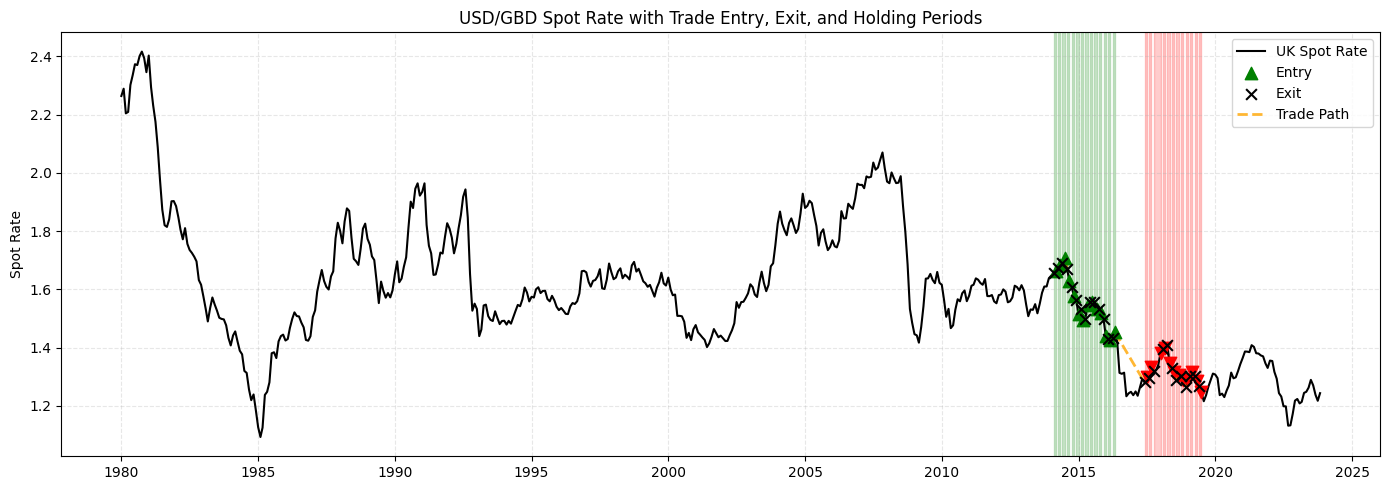

In [1240]:
# Final trading signal gragh for USD/GBD

UKposition_clean = UKposition.copy().fillna(0)
UKspot_rate = UKspot_rate.dropna()  # ensure no missing values

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(UKspot_rate.index, UKspot_rate, label='UK Spot Rate', color='black')

# Highlight holding periods (shaded) ----
for i in range(1, len(UKposition_clean)):
    if UKposition_clean.iloc[i] != 0:
        color = 'green' if UKposition_clean.iloc[i] == 1 else 'red'
        ax.axvspan(UKposition_clean.index[i-1], UKposition_clean.index[i], 
                   color=color, alpha=0.2)

# Detect entries & exits ----
entry_dates = []
exit_dates = []
entry_types = []  # +1 for long, -1 for short

for i in range(1, len(UKposition_clean)):
    prev = UKposition_clean.iloc[i - 1]
    curr = UKposition_clean.iloc[i]
    date = UKposition_clean.index[i]
    
    if prev == 0 and curr != 0:
        entry_dates.append(date)
        entry_types.append(curr)
    elif prev != 0 and curr == 0:
        exit_dates.append(date)

# Plot entry markers (▲/▼) ----
for date, direction in zip(entry_dates, entry_types):
    if date in UKspot_rate.index:
        rate = UKspot_rate.loc[date]
        marker = '^' if direction == 1 else 'v'
        color = 'green' if direction == 1 else 'red'
        ax.scatter(date, rate, marker=marker, color=color, s=80, zorder=5,
                   label='Entry' if date == entry_dates[0] else "")

# Plot exit markers (×) ----
for date in exit_dates:
    if date in UKspot_rate.index:
        rate = UKspot_rate.loc[date]
        ax.scatter(date, rate, marker='x', color='black', s=60, zorder=5,
                   label='Exit' if date == exit_dates[0] else "")

# Connect entry → exit with dashed line ----
for entry_date, direction in zip(entry_dates, entry_types):
    # Find the next exit after this entry
    possible_exits = [d for d in exit_dates if d > entry_date]
    if not possible_exits:
        continue  

    exit_date = possible_exits[0]

    # Get spot prices
    if entry_date in UKspot_rate.index and exit_date in UKspot_rate.index:
        entry_price = UKspot_rate.loc[entry_date]
        exit_price = UKspot_rate.loc[exit_date]

        ax.plot([entry_date, exit_date], [entry_price, exit_price],
                color='orange', linestyle='--', linewidth=2, alpha=0.8,
                label='Trade Path' if entry_date == entry_dates[0] else "")
        
# ax.set_xlim(pd.Timestamp("2014-01-01"), pd.Timestamp("2019-01-01"))

ax.set_title("USD/GBD Spot Rate with Trade Entry, Exit, and Holding Periods")
ax.set_ylabel("Spot Rate")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Backtest


--- USD/JPY Strategy Performance ---
Total Return: 18.09%
Sharpe Ratio: 0.27
Max Drawdown: -18.01%
Win Rate: 47.37%
Number of Trades: 95


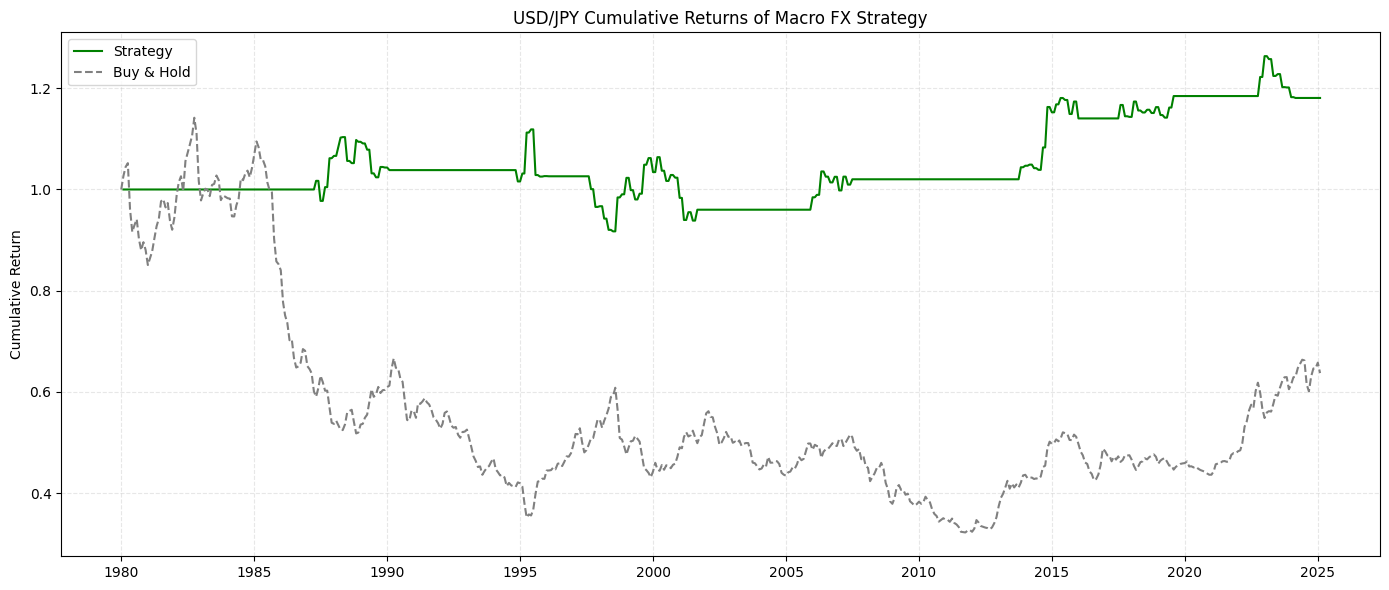

In [1241]:
# Ensure alignment
JPYspot_rate = JAPANspot_rate.sort_index()
JPYposition = JPYposition.reindex(JPYspot_rate.index).fillna(0)

# Calculate log returns
JPYreturns = np.log(JPYspot_rate / JPYspot_rate.shift(1)).fillna(0)

# Track individual trades
trades = []
in_trade = False
entry_date, entry_price, direction = None, None, None

for date in JPYposition.index:
    curr_pos = JPYposition.loc[date]

    if not in_trade and curr_pos != 0:
        # Entry signal
        in_trade = True
        entry_date = date
        entry_price = JPYspot_rate.loc[date]
        direction = curr_pos

    elif in_trade and curr_pos == 0:
        # Exit signal
        exit_date = date
        exit_price = JPYspot_rate.loc[date]
        trade_return = direction * (exit_price / entry_price - 1)
        duration = (exit_date - entry_date).days

        trades.append({
            "Entry Date": entry_date,
            "Exit Date": exit_date,
            "Direction": "Long" if direction == 1 else "Short",
            "Entry Price": entry_price,
            "Exit Price": exit_price,
            "Return": trade_return,
            "Duration (days)": duration
        })

        in_trade = False

trade_log = pd.DataFrame(trades)

JAPANstrategy_returns = JPYposition.shift(1) * JPYreturns
JAPANcumulative_returns = (1 + JAPANstrategy_returns).cumprod()

JPYbenchmark_returns = np.exp(JPYreturns.cumsum())

Jactive_mask = JPYposition.shift(1) != 0
Jactive_returns = JAPANstrategy_returns[Jactive_mask]

Jmean_active_return = Jactive_returns.mean()
Jstd_active_return = Jactive_returns.std(ddof=1)

JPYsharpe_active = (Jmean_active_return / Jstd_active_return) * np.sqrt(12)

total_return = JAPANcumulative_returns.iloc[-1] - 1
drawdown = (JAPANcumulative_returns / JAPANcumulative_returns.cummax() - 1).min()
win_rate = (trade_log["Return"] > 0).mean()

print("\n--- USD/JPY Strategy Performance ---")
print(f"Total Return: {total_return:.2%}")
print(f"Sharpe Ratio: {JPYsharpe_active:.2f}")
print(f"Max Drawdown: {drawdown:.2%}")
print(f"Win Rate: {win_rate:.2%}")
print(f"Number of Trades: {len(trade_log)}")

plt.figure(figsize=(14, 6))
plt.plot(JAPANcumulative_returns, label='Strategy', color='green')
plt.plot(JPYbenchmark_returns, label='Buy & Hold', color='gray', linestyle='--')
plt.title("USD/JPY Cumulative Returns of Macro FX Strategy")
plt.ylabel("Cumulative Return")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# show trade log preview
# trade_log


--- USD/GBD Strategy Performance ---
Total Return: 5.02%
Sharpe Ratio: 0.71
Max Drawdown: -6.24%
Win Rate: 66.67%
Number of Trades: 27


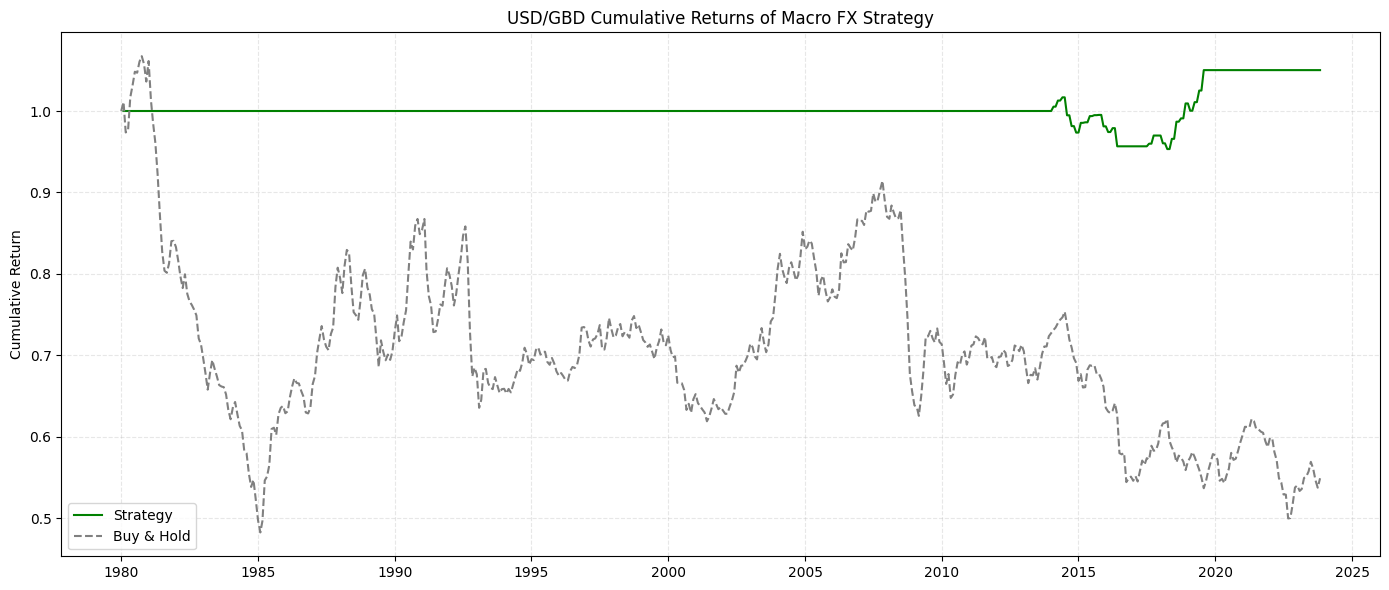

In [1242]:
# Ensure alignment
UKspot_rate = UKspot_rate.sort_index()
UKposition = UKposition.reindex(UKspot_rate.index).fillna(0)

# Calculate log returns
UKreturns = np.log(UKspot_rate / UKspot_rate.shift(1)).fillna(0)

# Track individual trades
trades = []
in_trade = False
entry_date, entry_price, direction = None, None, None

for date in UKposition.index:
    curr_pos = UKposition.loc[date]

    if not in_trade and curr_pos != 0:
        # Entry signal
        in_trade = True
        entry_date = date
        entry_price = UKspot_rate.loc[date]
        direction = curr_pos

    elif in_trade and curr_pos == 0:
        # Exit signal
        exit_date = date
        exit_price = UKspot_rate.loc[date]
        trade_return = direction * (exit_price / entry_price - 1)
        duration = (exit_date - entry_date).days

        trades.append({
            "Entry Date": entry_date,
            "Exit Date": exit_date,
            "Direction": "Long" if direction == 1 else "Short",
            "Entry Price": entry_price,
            "Exit Price": exit_price,
            "Return": trade_return,
            "Duration (days)": duration
        })

        in_trade = False

trade_log = pd.DataFrame(trades)

UKstrategy_returns = UKposition.shift(1) * UKreturns
UKcumulative_returns = (1 + UKstrategy_returns).cumprod()

UKbenchmark_returns = np.exp(UKreturns.cumsum())

UKactive_mask = UKposition.shift(1) != 0
UKactive_returns = UKstrategy_returns[Jactive_mask]
UKmean_active_return = UKactive_returns.mean()
UKstd_active_return = UKactive_returns.std(ddof=1)
UKsharpe_active = (UKmean_active_return / UKstd_active_return) * np.sqrt(12)

total_return = UKcumulative_returns.iloc[-1] - 1
drawdown = (UKcumulative_returns / UKcumulative_returns.cummax() - 1).min()
win_rate = (trade_log["Return"] > 0).mean()
avg_trade_return = trade_log["Return"].mean()

print("\n--- USD/GBD Strategy Performance ---")
print(f"Total Return: {total_return:.2%}")
print(f"Sharpe Ratio: {UKsharpe_active:.2f}")
print(f"Max Drawdown: {drawdown:.2%}")
print(f"Win Rate: {win_rate:.2%}")
print(f"Number of Trades: {len(trade_log)}")

plt.figure(figsize=(14, 6))
plt.plot(UKcumulative_returns, label='Strategy', color='green')
plt.plot(UKbenchmark_returns, label='Buy & Hold', color='gray', linestyle='--')
plt.title("USD/GBD Cumulative Returns of Macro FX Strategy")
plt.ylabel("Cumulative Return")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# show trade log preview
# trade_log

In [1243]:
# JPY beta & alpha
JPYstrategy_returns = JPYposition.shift(1) * JPYreturns

JPYactive_mask = JPYposition.shift(1) != 0
df = pd.DataFrame({
    'Rs': JPYstrategy_returns[JPYactive_mask],
    'Rm': JPYreturns[JPYactive_mask]
}).dropna()

JPYRs = df['Rs']
JPYRm = df['Rm']

# Beta
JPYcov = np.cov(JPYRs, JPYRm, ddof=1)
JPYbeta = JPYcov[0, 1] / JPYcov[1, 1]

# Alpha
JPYalpha = JPYRs.mean() - JPYbeta * JPYRm.mean()
JPYalpha = np.exp(JPYalpha * 12) - 1

print(f"Active Trade JPY Beta: {JPYbeta:.4f}")
print(f"Active Trade JPY Alpha: {JPYalpha:.4%}")

Active Trade JPY Beta: -0.7083
Active Trade JPY Alpha: 2.7717%


In [1244]:
# UK beta & alpha
UKstrategy_returns = UKposition.shift(1) * UKreturns

UKactive_mask = UKposition.shift(1) != 0
df = pd.DataFrame({
    'Rs': UKstrategy_returns[UKactive_mask],
    'Rm': UKreturns[UKactive_mask]
}).dropna()

UKRs = df['Rs']
UKRm = df['Rm']

# Beta
UKcov = np.cov(UKRs, UKRm, ddof=1)
UKbeta = UKcov[0, 1] / UKcov[1, 1]

# Alpha
UKalpha = UKRs.mean() - UKbeta * UKRm.mean()
UKalpha = np.exp(UKalpha * 12) - 1

print(f"Active Trade UK Beta: {UKbeta:.4f}")
print(f"Active Trade UK Alpha: {UKalpha:.4%}")

Active Trade UK Beta: -0.0553
Active Trade UK Alpha: 1.9464%
